## Task 1: Data Cleaning 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import sys
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
np.set_printoptions(threshold=sys.maxsize)
#increasing the print size is according to the following link 
#https://stackoverflow.com/questions/55881651/how-to-print-a-big-dimension-of-confusion-matrix

In [2]:
BLE_RSSI='/Users/stephaniechoo/Desktop/PDS_Assignment2/BLE_RSSI_dataset/iBeacon_RSSI_Labeled.csv'
#This was the old directory, please tun the pwd line and then put /s3846487/BLE_RSSI_dataset/iBeacon_RSSI_Labeled.csv
#after that

In [3]:
pwd

'/Users/stephaniechoo/Desktop/PDS_Assignment2'

In [4]:
BLE_RSSI_p=pd.read_csv(BLE_RSSI, sep=',',skiprows=1, header = None)

In [5]:
print(BLE_RSSI_p.info())
#Check the data types of the columns
# Checking information for each column 
#Ref: https://www.datacamp.com/community/tutorials/categorical-data?fbclid=IwAR36wHr5Wr9NIcWXFBjI9Bev1ZsO1hF81entMp7U9sfZ_nvRp9IMLs2Sttw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
0     1420 non-null object
1     1420 non-null object
2     1420 non-null int64
3     1420 non-null int64
4     1420 non-null int64
5     1420 non-null int64
6     1420 non-null int64
7     1420 non-null int64
8     1420 non-null int64
9     1420 non-null int64
10    1420 non-null int64
11    1420 non-null int64
12    1420 non-null int64
13    1420 non-null int64
14    1420 non-null int64
dtypes: int64(13), object(2)
memory usage: 166.5+ KB
None


In [6]:
BLE_RSSI_df= pd.DataFrame(BLE_RSSI_p)
#Making a data frame for the CSV file.

In [7]:
BLE_RSSI_copy = BLE_RSSI_df.copy()

In [8]:
BLE_RSSI_copy.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [9]:
BLE_RSSI_copy= BLE_RSSI_copy.rename(columns={0:'Location', 1:'Date',2: 'b3001',  3: 'b3002',  4: 'b3003', 5: 'b3004', 6: 'b3005',7: 'b3006',8: 'b3007',9: 'b3008',10: 'b3009', 11: 'b3010', 12: 'b3011', 13: 'b3012', 14:'b3013'})
BLE_RSSI_copy.head()
#Check the headers have been re-inserted properly. 

,Location,Date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [10]:
BLE_RSSI_dat =BLE_RSSI_copy.drop(columns=['Location', 'Date'])
BLE_RSSI_dat.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [11]:
pd.options.display.max_rows = 1000
#Above code to print out entire value_counts list 
#https://stackoverflow.com/questions/43909817/how-to-stop-jupyter-outputting-truncated-results-when-using-pd-series-value-coun
BLE_RSSI_copy['Location'].value_counts()

#Print out the entire cross tab
# 105 Different locations 

K04    34
J04    32
J06    29
I07    27
I06    27
J07    27
I08    26
K05    25
O04    24
O05    24
J03    24
Q05    24
S01    23
K03    23
K06    22
J02    22
L06    22
S02    21
I02    21
L04    20
S05    20
S06    20
M06    20
I03    19
J05    19
I05    19
M04    19
R02    18
Q03    18
Q04    18
I01    18
I04    18
S04    18
W15    17
S03    17
R05    16
J01    16
R03    15
O06    15
R01    14
M02    14
I10    14
N06    14
L05    14
N03    14
D15    14
U03    14
P01    13
L03    13
P04    13
O03    13
R15    12
N01    12
N15    12
K08    12
N05    12
T04    12
P05    12
P03    12
N02    12
M03    12
K07    11
L15    10
M05    10
T05    10
M01    10
U04    10
S07    10
U02    10
R04    10
N04    10
L02    10
J08     9
K02     9
P06     8
V15     8
U05     8
I09     8
U01     8
J15     8
O02     8
P15     7
T15     7
P02     6
D13     6
T03     6
L01     6
R06     6
J10     6
Q01     6
K01     6
U15     5
I15     5
T01     4
E15     4
G15     4
S08     4
F08     4
Q06     4
Q02     4


In [12]:
#Make a different dataset for visualisation, scores? 

In [13]:
BLE_RSSI_copy['Location'].unique()
#All of the unique locations. 

array(['O02', 'P01', 'P02', 'R01', 'R02', 'S01', 'S02', 'T01', 'U02',
       'U01', 'J03', 'K03', 'L03', 'M03', 'N03', 'O03', 'P03', 'Q03',
       'R03', 'S03', 'T03', 'U03', 'U04', 'T04', 'S04', 'R04', 'Q04',
       'P04', 'O04', 'N04', 'M04', 'L04', 'K04', 'J04', 'I04', 'I05',
       'J05', 'K05', 'L05', 'M05', 'N05', 'O05', 'P05', 'Q05', 'R05',
       'S05', 'T05', 'U05', 'S06', 'R06', 'Q06', 'P06', 'O06', 'N06',
       'M06', 'L06', 'K06', 'J06', 'I06', 'F08', 'J02', 'J07', 'I07',
       'I10', 'J10', 'D15', 'E15', 'G15', 'J15', 'L15', 'R15', 'T15',
       'W15', 'I08', 'I03', 'J08', 'I01', 'I02', 'J01', 'K01', 'K02',
       'L01', 'L02', 'M01', 'M02', 'N01', 'N02', 'O01', 'I09', 'D14',
       'D13', 'K07', 'K08', 'N15', 'P15', 'I15', 'S15', 'U15', 'V15',
       'S07', 'S08', 'L09', 'L08', 'Q02', 'Q01'], dtype=object)

In [14]:
BLE_RSSI_copy['Location'].value_counts()

K04    34
J04    32
J06    29
I07    27
I06    27
J07    27
I08    26
K05    25
O04    24
O05    24
J03    24
Q05    24
S01    23
K03    23
K06    22
J02    22
L06    22
S02    21
I02    21
L04    20
S05    20
S06    20
M06    20
I03    19
J05    19
I05    19
M04    19
R02    18
Q03    18
Q04    18
I01    18
I04    18
S04    18
W15    17
S03    17
R05    16
J01    16
R03    15
O06    15
R01    14
M02    14
I10    14
N06    14
L05    14
N03    14
D15    14
U03    14
P01    13
L03    13
P04    13
O03    13
R15    12
N01    12
N15    12
K08    12
N05    12
T04    12
P05    12
P03    12
N02    12
M03    12
K07    11
L15    10
M05    10
T05    10
M01    10
U04    10
S07    10
U02    10
R04    10
N04    10
L02    10
J08     9
K02     9
P06     8
V15     8
U05     8
I09     8
U01     8
J15     8
O02     8
P15     7
T15     7
P02     6
D13     6
T03     6
L01     6
R06     6
J10     6
Q01     6
K01     6
U15     5
I15     5
T01     4
E15     4
G15     4
S08     4
F08     4
Q06     4
Q02     4


In [15]:
BLE_RSSI_copy.groupby(['Location']).b3001.value_counts()

Location  b3001
D13       -200      6
D14       -200      4
D15       -200     14
E15       -200      4
F08       -71       1
          -70       1
          -68       1
          -67       1
G15       -200      4
I01       -200     18
I02       -200     21
I03       -200     19
I04       -200     16
          -75       1
          -74       1
I05       -200     19
I06       -200     27
I07       -200     23
          -81       1
          -80       1
          -78       1
          -77       1
I08       -200     14
          -80       3
          -81       2
          -79       2
          -78       2
          -77       1
          -73       1
          -72       1
I09       -200      6
          -78       1
          -77       1
I10       -200     14
I15       -200      5
J01       -200     16
J02       -200     22
J03       -200     24
J04       -200     32
J05       -200     19
J06       -200     29
J07       -200     27
J08       -200      9
J10       -200      6
J15       -200  

In [16]:
#Creating a filtered dataframe BLE_RSSI_filtered that doesn't include -200, replacing -200 with NaN.
#This is because 
BLE_RSSI_filtered = BLE_RSSI_copy.replace(-200, np.nan)

In [17]:
#Checking if there are any values less than -200 in each of the beacon columns?
sum(BLE_RSSI_copy['b3001'] < -200)

0

In [18]:
sum(BLE_RSSI_copy['b3002'] < -200)

0

In [19]:
sum(BLE_RSSI_copy['b3003'] < -200)

0

In [20]:
sum(BLE_RSSI_copy['b3004'] < -200)

0

In [21]:
sum(BLE_RSSI_copy['b3005'] < -200)

0

In [22]:
sum(BLE_RSSI_copy['b3006'] < -200)

0

In [23]:
sum(BLE_RSSI_copy['b3007'] < -200)

0

In [24]:
sum(BLE_RSSI_copy['b3008'] < -200)

0

In [25]:
sum(BLE_RSSI_copy['b3009'] < -200)

0

In [26]:
sum(BLE_RSSI_copy['b3010'] < -200)

0

In [27]:
sum(BLE_RSSI_copy['b3011'] < -200)

0

In [28]:
sum(BLE_RSSI_copy['b3013'] < -200)

0

In [29]:
#Any values greater than 0 in the raw data set? 
sum(BLE_RSSI_copy['b3001'] >= 0)

0

In [30]:
sum(BLE_RSSI_copy['b3002'] >= 0)

0

In [31]:
sum(BLE_RSSI_copy['b3003'] >= 0)

0

In [32]:
sum(BLE_RSSI_copy['b3004'] >= 0)

0

In [33]:
sum(BLE_RSSI_copy['b3005'] >= 0)

0

In [34]:
sum(BLE_RSSI_copy['b3006'] >= 0)

0

In [35]:
sum(BLE_RSSI_copy['b3007'] >= 0)

0

In [36]:
sum(BLE_RSSI_copy['b3008'] >= 0)

0

In [37]:
sum(BLE_RSSI_copy['b3009'] >= 0)

0

In [38]:
sum(BLE_RSSI_copy['b3010'] >= 0)

0

In [39]:
sum(BLE_RSSI_copy['b3011'] >= 0)

0

In [40]:
sum(BLE_RSSI_copy['b3012'] >= 0)

0

In [41]:
sum(BLE_RSSI_copy['b3013'] >= 0)

0

In [42]:
BLE_RSSI_filtered.describe()
#summary statistics for dataset(without -200)
#np.set_printoptions(linewidth=110)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,25.000000,497.000000,280.000000,402.000000,247.000000,287.000000,50.000000,91.000000,31.000000,29.000000,25.000000,35.000000,44.000000
mean,-76.480000,-76.068410,-75.917857,-74.723881,-75.696356,-76.620209,-76.100000,-74.703297,-69.225806,-74.758621,-72.120000,-87.771429,-73.022727
std,4.134408,19.250454,5.794297,5.136625,4.695711,4.019012,6.952462,6.013863,8.849519,6.168209,7.562627,41.246808,7.963547
min,-81.000000,-198.000000,-88.000000,-88.000000,-83.000000,-87.000000,-85.000000,-83.000000,-82.000000,-81.000000,-85.000000,-199.000000,-87.000000
25%,-80.000000,-78.000000,-80.000000,-78.000000,-79.000000,-79.000000,-80.750000,-79.000000,-77.000000,-79.000000,-79.000000,-81.000000,-79.500000
50%,-78.000000,-74.000000,-78.000000,-76.000000,-77.000000,-77.000000,-79.000000,-77.000000,-72.000000,-78.000000,-72.000000,-79.000000,-75.000000
75%,-74.000000,-69.000000,-74.000000,-71.000000,-73.000000,-75.000000,-73.000000,-71.500000,-59.500000,-72.000000,-67.000000,-67.000000,-65.750000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-59.000000


In [43]:
BLE_RSSI_copy.describe()
#Summary statistics for full dataset (including -200)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,-197.825352,-156.623944,-175.533099,-164.534507,-178.378169,-175.063380,-195.637324,-191.970423,-197.145070,-197.442254,-197.748592,-197.233803,-196.065493
std,16.259105,60.217747,49.452958,56.523261,47.175799,49.596627,22.880980,30.733742,19.160207,17.741632,16.852535,18.541088,22.053924
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
50%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
75%,-200.000000,-78.000000,-200.000000,-80.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-59.000000


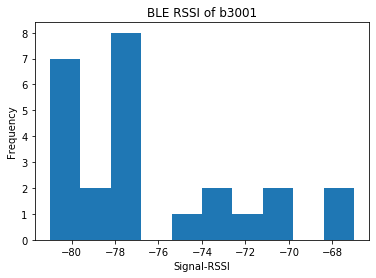

In [44]:
BLE_RSSI_filtered['b3001'].plot(kind='hist')     
plt.title('BLE RSSI of b3001')         
plt.xlabel('Signal-RSSI')        
plt.show()

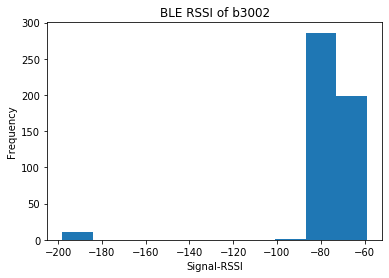

In [45]:
BLE_RSSI_filtered['b3002'].plot(kind='hist')     
plt.title('BLE RSSI of b3002')         
plt.xlabel('Signal-RSSI')        
plt.show()

In [46]:
BLE_RSSI_filtered['b3002'].value_counts()

-80.0     34
-78.0     34
-77.0     32
-76.0     31
-75.0     31
-74.0     29
-81.0     28
-72.0     27
-79.0     27
-66.0     25
-73.0     25
-65.0     23
-70.0     19
-67.0     18
-71.0     17
-68.0     16
-69.0     15
-64.0     14
-63.0     12
-198.0    11
-62.0      6
-82.0      5
-84.0      3
-60.0      3
-83.0      3
-86.0      2
-61.0      2
-59.0      2
-85.0      2
-87.0      1
Name: b3002, dtype: int64

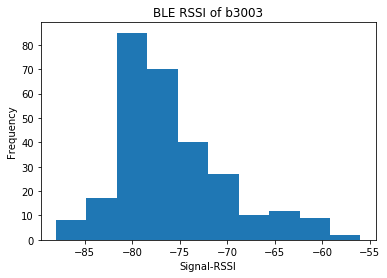

In [47]:
BLE_RSSI_filtered['b3003'].plot(kind='hist')     
plt.title('BLE RSSI of b3003')         
plt.xlabel('Signal-RSSI')        
plt.show()

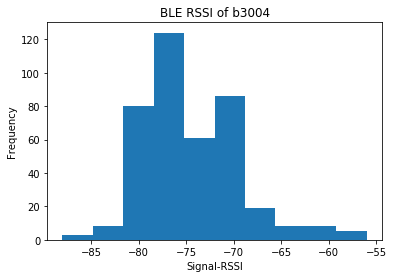

In [48]:
BLE_RSSI_filtered['b3004'].plot(kind='hist')     
plt.title('BLE RSSI of b3004')         
plt.xlabel('Signal-RSSI')        
plt.show()

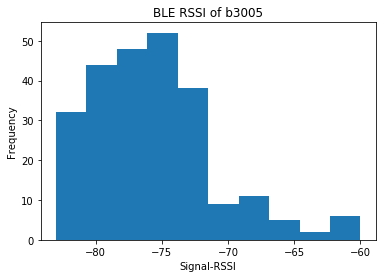

In [49]:
BLE_RSSI_filtered['b3005'].plot(kind='hist')     
plt.title('BLE RSSI of b3005')         
plt.xlabel('Signal-RSSI')        
plt.show()

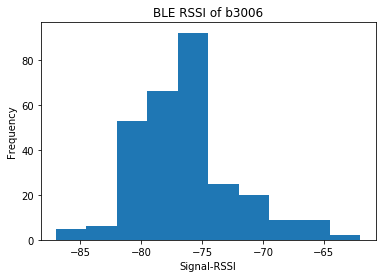

In [50]:
BLE_RSSI_filtered['b3006'].plot(kind='hist')     
plt.title('BLE RSSI of b3006')         
plt.xlabel('Signal-RSSI')        
plt.show()

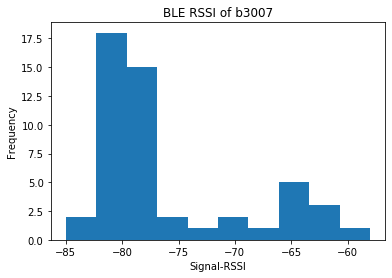

In [51]:
BLE_RSSI_filtered['b3007'].plot(kind='hist')     
plt.title('BLE RSSI of b3007')         
plt.xlabel('Signal-RSSI')        
plt.show()

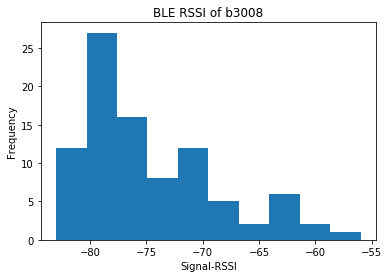

In [52]:
BLE_RSSI_filtered['b3008'].plot(kind='hist')     
plt.title('BLE RSSI of b3008')         
plt.xlabel('Signal-RSSI')        
plt.show()

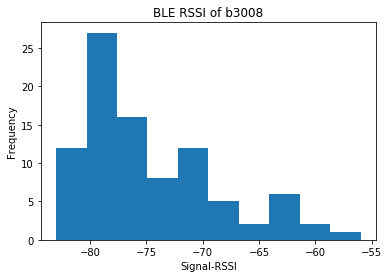

In [53]:
BLE_RSSI_filtered['b3008'].plot(kind='hist')     
plt.title('BLE RSSI of b3008')         
plt.xlabel('Signal-RSSI')        
plt.show()

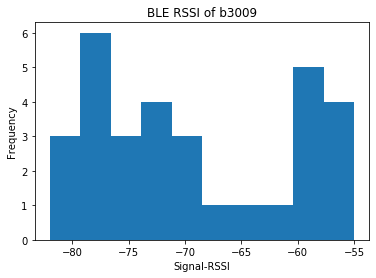

In [54]:
BLE_RSSI_filtered['b3009'].plot(kind='hist')     
plt.title('BLE RSSI of b3009')         
plt.xlabel('Signal-RSSI')        
plt.show()

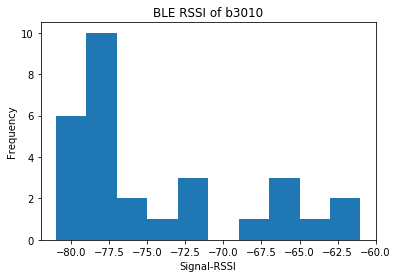

In [55]:
BLE_RSSI_filtered['b3010'].plot(kind='hist')     
plt.title('BLE RSSI of b3010')         
plt.xlabel('Signal-RSSI')        
plt.show()

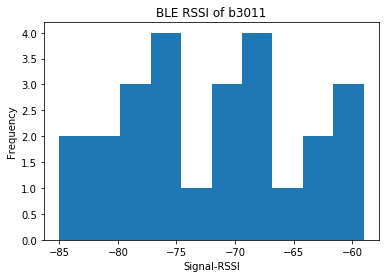

In [56]:
BLE_RSSI_filtered['b3011'].plot(kind='hist')     
plt.title('BLE RSSI of b3011')         
plt.xlabel('Signal-RSSI')        
plt.show()

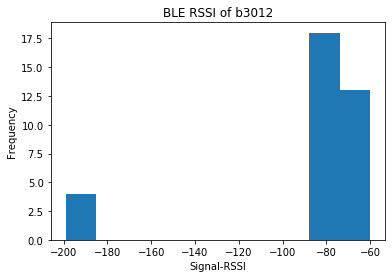

In [57]:
BLE_RSSI_filtered['b3012'].plot(kind='hist')     
plt.title('BLE RSSI of b3012')         
plt.xlabel('Signal-RSSI')        
plt.show()

In [58]:
BLE_RSSI_filtered['b3012'].value_counts()

-81.0     8
-199.0    4
-60.0     2
-82.0     2
-61.0     2
-68.0     2
-80.0     2
-79.0     2
-67.0     2
-62.0     1
-77.0     1
-74.0     1
-78.0     1
-76.0     1
-65.0     1
-66.0     1
-73.0     1
-63.0     1
Name: b3012, dtype: int64

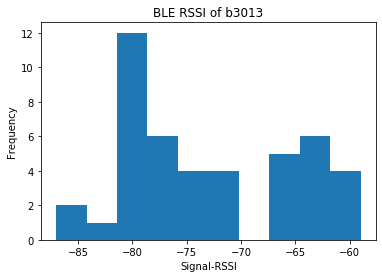

In [59]:
BLE_RSSI_filtered['b3013'].plot(kind='hist')     
plt.title('BLE RSSI of b3013')         
plt.xlabel('Signal-RSSI')        
plt.show()

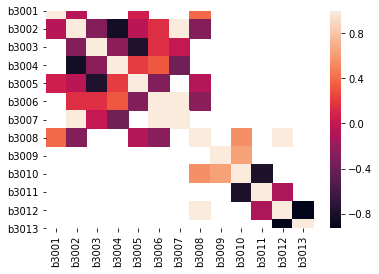

In [62]:
corrMatrix = BLE_RSSI_filtered.corr()
sn.heatmap(corrMatrix)
plt.show()
#https://datatofish.com/correlation-matrix-pandas/
#it's a comparison of the actual RSSI values to different beacons,
#and how similar they are to other beacons. 

# Greatest similarity - b3006 and b3007, b3012 and b3008, b3007 and b3002. 
#These beacons have similar 


In [63]:
(BLE_RSSI_filtered['b3001']).count()

25

In [64]:
(BLE_RSSI_filtered['b3001']).value_counts()

-78.0    5
-80.0    4
-81.0    3
-77.0    3
-79.0    2
-67.0    1
-71.0    1
-74.0    1
-70.0    1
-72.0    1
-73.0    1
-68.0    1
-75.0    1
Name: b3001, dtype: int64

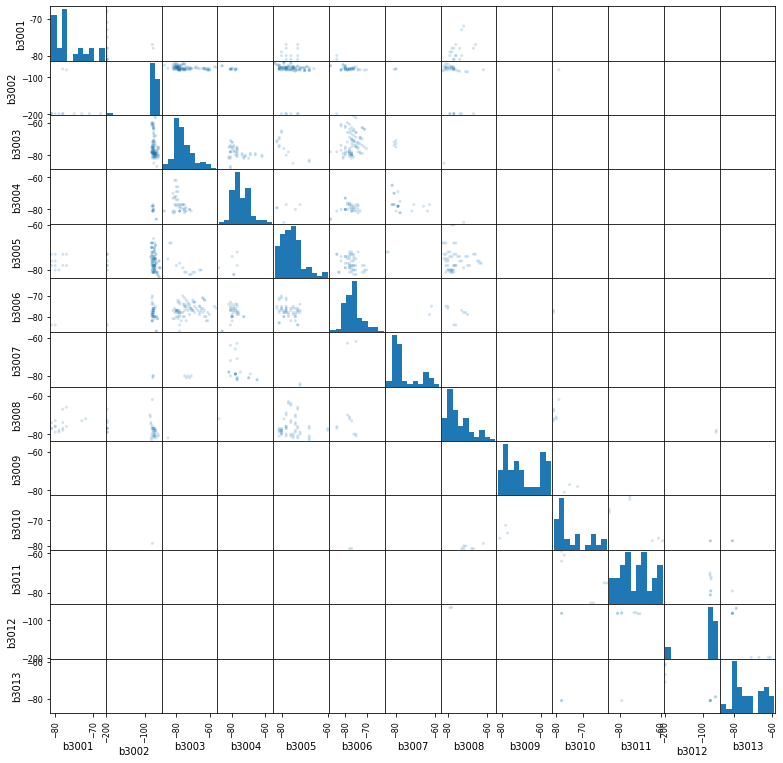

In [65]:
from pandas.plotting import scatter_matrix
scatter_matrix(BLE_RSSI_filtered,alpha=0.2,figsize=(13,13),diagonal='hist')         
plt.show()

#Scatter matrix between all 13 beacons against each other. 

Text(0, 0.5, 'b3006')

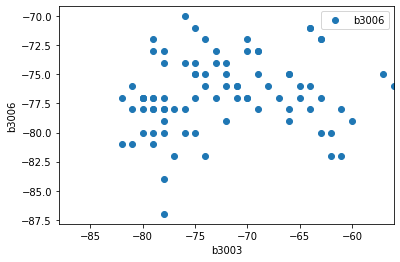

In [66]:
BLE_RSSI_filtered.plot(x='b3003', y='b3006', style='o')
plt.xlabel('b3003')
plt.ylabel('b3006')

Text(0, 0.5, 'b3011')

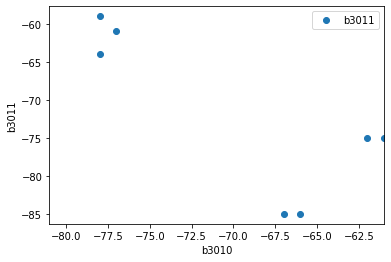

In [67]:
BLE_RSSI_filtered.plot(x='b3010', y='b3011', style='o')
plt.xlabel('b3010')
plt.ylabel('b3011')

Text(0, 0.5, 'b3008')

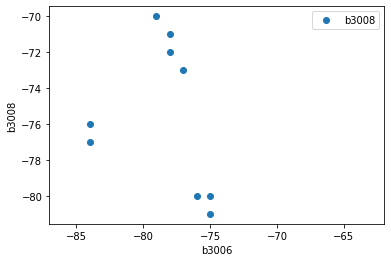

In [68]:
BLE_RSSI_filtered.plot(x='b3006', y='b3008', style='o')
plt.xlabel('b3006')
plt.ylabel('b3008')

Text(0, 0.5, 'b3006')

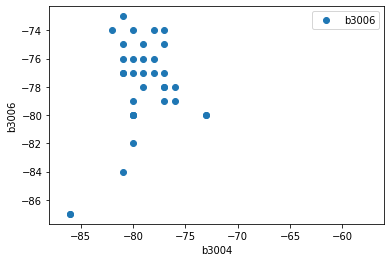

In [69]:
BLE_RSSI_filtered.plot(x='b3004', y='b3006', style='o')
plt.xlabel('b3004')
plt.ylabel('b3006')

Text(0, 0.5, 'b3006')

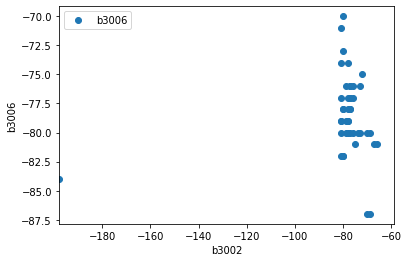

In [70]:
BLE_RSSI_filtered.plot(x='b3002', y='b3006', style='o')
plt.xlabel('b3002')
plt.ylabel('b3006')

Text(0, 0.5, 'b3003')

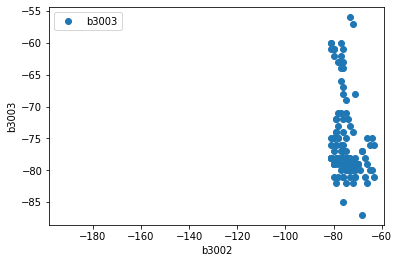

In [71]:
BLE_RSSI_filtered.plot(x='b3002', y='b3003', style='o')
plt.xlabel('b3002')
plt.ylabel('b3003')

Text(0, 0.5, 'b3006')

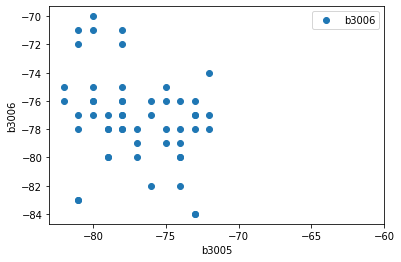

In [72]:
BLE_RSSI_filtered.plot(x='b3005', y='b3006', style='o')
plt.xlabel('b3005')
plt.ylabel('b3006')

Text(0, 0.5, 'b3012')

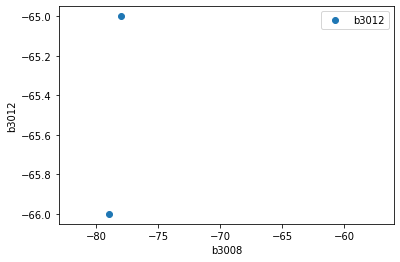

In [73]:
BLE_RSSI_filtered.plot(x='b3008', y='b3012', style='o')
plt.xlabel('b3008')
plt.ylabel('b3012')

Text(0, 0.5, 'b3009')

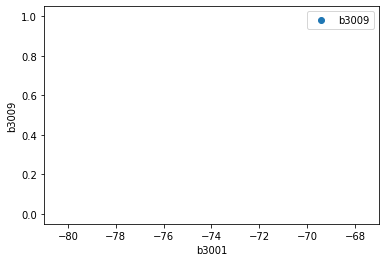

In [74]:
BLE_RSSI_filtered.plot(x='b3001', y='b3009', style='o')
plt.xlabel('b3001')
plt.ylabel('b3009')

Text(0, 0.5, 'b3007')

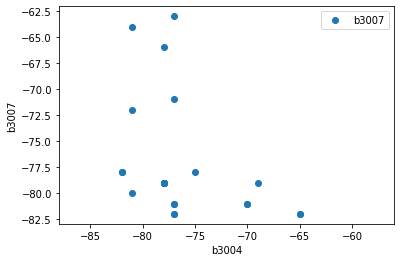

In [75]:
BLE_RSSI_filtered.plot(x='b3004', y='b3007', style='o')
plt.xlabel('b3004')
plt.ylabel('b3007')
 #close to the stair case
#code from 
#https://stackoverflow.com/questions/17812978/how-to-plot-two-columns-of-a-pandas-data-frame-using-points

Text(0, 0.5, 'b3007')

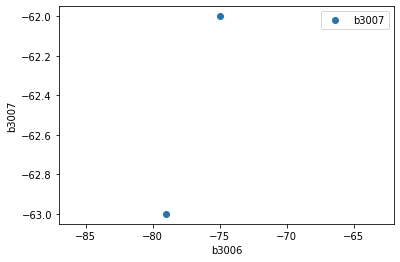

In [76]:
BLE_RSSI_filtered.plot(x='b3006', y='b3007', style='o')
plt.xlabel('b3006')
plt.ylabel('b3007')
#Showed up as the most similar in the correlation matrix
#code from 
#https://stackoverflow.com/questions/17812978/how-to-plot-two-columns-of-a-pandas-data-frame-using-points

Text(0, 0.5, 'b3002')

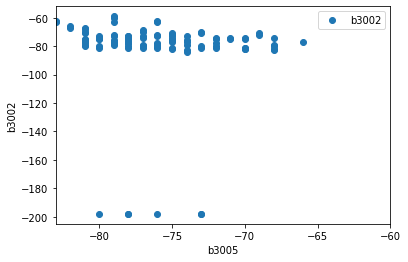

In [77]:
BLE_RSSI_filtered.plot(x='b3005', y='b3002', style='o')
plt.xlabel('b3005')
plt.ylabel('b3002')
#Columns are close to each other 

Text(0, 0.5, 'b3008')

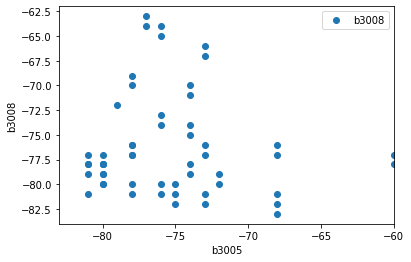

In [78]:
BLE_RSSI_filtered.plot(x='b3005', y='b3008', style='o')
plt.xlabel('b3005')
plt.ylabel('b3008')
#Columns are close to each other 

Text(0, 0.5, 'b3006')

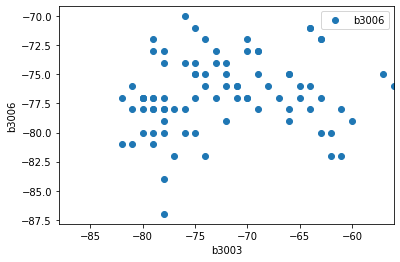

In [79]:
BLE_RSSI_filtered.plot(x='b3003', y='b3006', style='o')
plt.xlabel('b3003')
plt.ylabel('b3006')
#Columns are close to each other 

Text(0, 0.5, 'b3003')

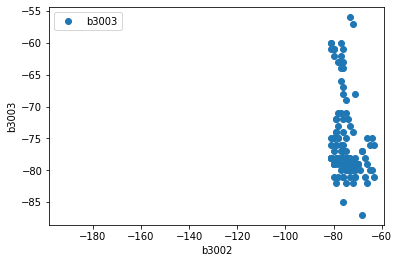

In [80]:
BLE_RSSI_filtered.plot(x='b3002', y='b3003', style='o')
plt.xlabel('b3002')
plt.ylabel('b3003')
#Columns are close to each other 

Text(0, 0.5, 'b3013')

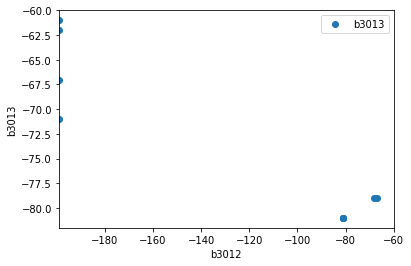

In [81]:
BLE_RSSI_filtered.plot(x='b3012', y='b3013', style='o')
plt.xlabel('b3012')
plt.ylabel('b3013')

Text(0, 0.5, 'b3008')

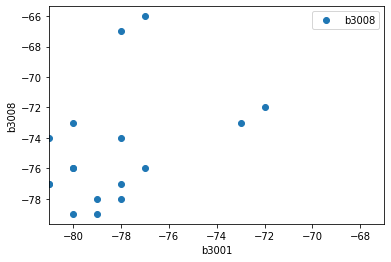

In [82]:
BLE_RSSI_filtered.plot(x='b3001', y='b3008', style='o')
plt.xlabel('b3001')
plt.ylabel('b3008')

#Data points close to entrance (beacon )

Text(0, 0.5, 'b3011')

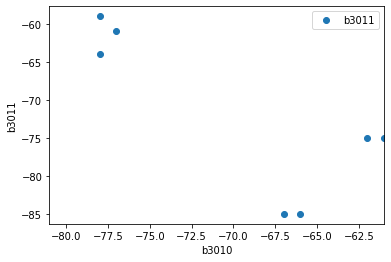

In [83]:
BLE_RSSI_filtered.plot(x='b3010', y='b3011', style='o')
plt.xlabel('b3010')
plt.ylabel('b3011')

Text(0, 0.5, 'b3010')

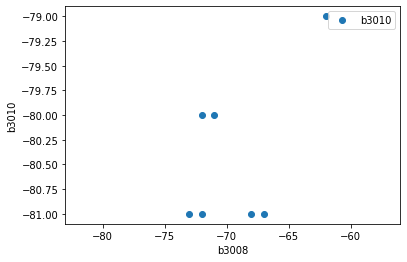

In [84]:
BLE_RSSI_filtered.plot(x='b3008', y='b3010', style='o')
plt.xlabel('b3008')
plt.ylabel('b3010')

Text(0, 0.5, 'b3004')

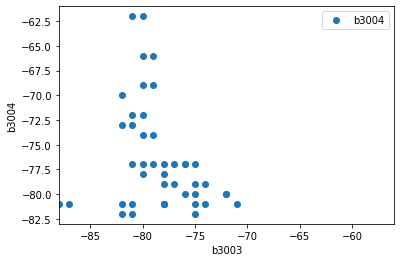

In [85]:
BLE_RSSI_filtered.plot(x='b3003', y='b3004', style='o')
plt.xlabel('b3003')
plt.ylabel('b3004')

Text(0, 0.5, 'b3003')

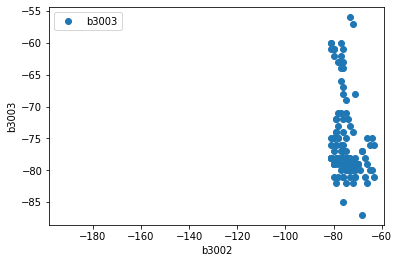

In [86]:
BLE_RSSI_filtered.plot(x='b3002', y='b3003', style='o')
plt.xlabel('b3002')
plt.ylabel('b3003')

Text(0, 0.5, 'b3008')

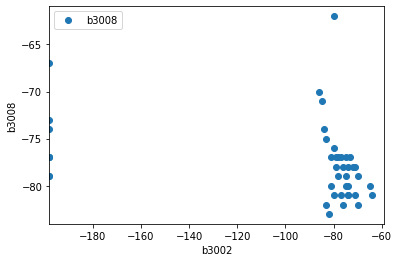

In [87]:
BLE_RSSI_filtered.plot(x='b3002', y='b3008', style='o')
plt.xlabel('b3002')
plt.ylabel('b3008')

In [88]:
BLE_RSSI_copy.describe()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,-197.825352,-156.623944,-175.533099,-164.534507,-178.378169,-175.063380,-195.637324,-191.970423,-197.145070,-197.442254,-197.748592,-197.233803,-196.065493
std,16.259105,60.217747,49.452958,56.523261,47.175799,49.596627,22.880980,30.733742,19.160207,17.741632,16.852535,18.541088,22.053924
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
50%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
75%,-200.000000,-78.000000,-200.000000,-80.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-59.000000


In [89]:
BLE_RSSI_filtered.describe()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,25.000000,497.000000,280.000000,402.000000,247.000000,287.000000,50.000000,91.000000,31.000000,29.000000,25.000000,35.000000,44.000000
mean,-76.480000,-76.068410,-75.917857,-74.723881,-75.696356,-76.620209,-76.100000,-74.703297,-69.225806,-74.758621,-72.120000,-87.771429,-73.022727
std,4.134408,19.250454,5.794297,5.136625,4.695711,4.019012,6.952462,6.013863,8.849519,6.168209,7.562627,41.246808,7.963547
min,-81.000000,-198.000000,-88.000000,-88.000000,-83.000000,-87.000000,-85.000000,-83.000000,-82.000000,-81.000000,-85.000000,-199.000000,-87.000000
25%,-80.000000,-78.000000,-80.000000,-78.000000,-79.000000,-79.000000,-80.750000,-79.000000,-77.000000,-79.000000,-79.000000,-81.000000,-79.500000
50%,-78.000000,-74.000000,-78.000000,-76.000000,-77.000000,-77.000000,-79.000000,-77.000000,-72.000000,-78.000000,-72.000000,-79.000000,-75.000000
75%,-74.000000,-69.000000,-74.000000,-71.000000,-73.000000,-75.000000,-73.000000,-71.500000,-59.500000,-72.000000,-67.000000,-67.000000,-65.750000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-59.000000


Text(0, 0.5, 'BLE-RSSI signal')

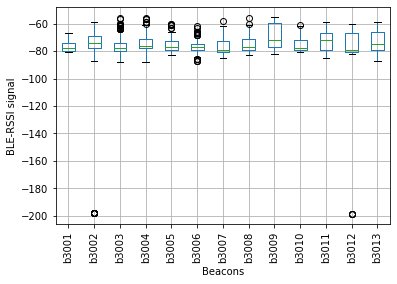

In [90]:
BLE_RSSI_filtered.boxplot()
plt.xticks(rotation=90)
plt.xlabel('Beacons')
plt.ylabel('BLE-RSSI signal')

## Modelling

In [91]:
#Target dataframe 
BLE_RSSI_target = pd.DataFrame(BLE_RSSI_copy['Location'])

BLE_RSSI_target

,Location
0,O02
1,P01
2,P01
3,P01
4,P01
...,...
1415,I01
1416,I01
1417,I01
1418,I01


In [92]:
#https://stackoverflow.com/questions/52681747/how-to-get-only-distinct-values-from-a-list/52681933
#To get distinct target names 

target_names_non_distinct= BLE_RSSI_target['Location'].values.tolist()
target_names =list(set(target_names_non_distinct))
target_names


['R06',
 'P03',
 'R15',
 'P05',
 'L08',
 'M05',
 'I10',
 'T15',
 'J10',
 'U15',
 'N06',
 'K04',
 'L05',
 'M04',
 'S15',
 'M06',
 'U03',
 'O01',
 'K01',
 'N15',
 'J01',
 'M02',
 'R03',
 'O02',
 'I03',
 'J07',
 'L01',
 'K07',
 'J03',
 'I09',
 'I08',
 'D13',
 'T01',
 'K02',
 'E15',
 'L09',
 'N02',
 'P04',
 'O04',
 'I02',
 'S05',
 'S07',
 'U02',
 'I07',
 'R02',
 'K06',
 'Q02',
 'T05',
 'R01',
 'P06',
 'Q04',
 'J15',
 'N03',
 'S02',
 'I06',
 'T04',
 'M03',
 'N05',
 'K08',
 'J06',
 'N04',
 'P15',
 'R05',
 'O06',
 'M01',
 'D14',
 'V15',
 'W15',
 'T03',
 'N01',
 'I05',
 'Q01',
 'O03',
 'L06',
 'J02',
 'P01',
 'R04',
 'K03',
 'L02',
 'L15',
 'K05',
 'Q06',
 'I01',
 'F08',
 'I04',
 'G15',
 'J08',
 'S08',
 'J04',
 'S06',
 'U01',
 'J05',
 'O05',
 'Q05',
 'S01',
 'S03',
 'P02',
 'U05',
 'U04',
 'L04',
 'L03',
 'S04',
 'Q03',
 'I15',
 'D15']

In [93]:
#data  dataframe 
BLE_RSSI_data = pd.DataFrame(BLE_RSSI_dat)

feature_name= list(BLE_RSSI_data.columns[:13])

feat_names= BLE_RSSI_data.columns.values.tolist()
feat_names

['b3001',
 'b3002',
 'b3003',
 'b3004',
 'b3005',
 'b3006',
 'b3007',
 'b3008',
 'b3009',
 'b3010',
 'b3011',
 'b3012',
 'b3013']

In [94]:
BLE_RSSI_data

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [106]:
###Attempting to use test= 0.2 with default parameters in Decision tree classifier 
 
X_train, X_test, y_train, y_test = train_test_split(BLE_RSSI_data,BLE_RSSI_target,test_size=0.2,random_state=0)

X_train

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
863,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-67
654,-200,-200,-200,-70,-200,-200,-200,-200,-200,-200,-200,-200,-200
299,-200,-200,-200,-200,-200,-200,-80,-200,-200,-200,-200,-200,-200
539,-200,-200,-200,-200,-200,-200,-200,-200,-70,-200,-200,-200,-200
981,-200,-200,-200,-81,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-200,-68,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
835,-200,-200,-200,-200,-74,-200,-200,-200,-200,-200,-200,-200,-200
1216,-200,-200,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200
559,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [107]:
X_train.shape

(1136, 13)

In [108]:
y_train

,Location
863,W15
654,S04
299,R06
539,D14
981,P06
...,...
763,J03
835,J08
1216,R03
559,J03


In [109]:
y_train.shape

(1136, 1)

In [110]:
X_test

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1273,-200,-64,-80,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
393,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-71,-82,-200
1275,-200,-65,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1280,-200,-68,-77,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
141,-200,-79,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
724,-200,-79,-200,-200,-74,-76,-200,-200,-200,-200,-200,-200,-200
1259,-200,-76,-74,-200,-81,-200,-200,-200,-200,-200,-200,-200,-200
775,-200,-73,-200,-200,-74,-200,-200,-200,-200,-200,-200,-200,-200
634,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-62
224,-200,-200,-200,-200,-200,-73,-200,-200,-200,-200,-200,-200,-200


In [111]:
X_test.shape

(284, 13)

In [112]:
y_test

,Location
1273,J03
393,L15
1275,J03
1280,I03
141,P04
724,K06
1259,L03
775,J06
634,W15
224,L05


In [113]:
y_test.shape

(284, 1)

In [114]:
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
y_pre

array(['K04', 'L15', 'J04', 'K04', 'J02', 'K06', 'L03', 'K06', 'W15',
       'O06', 'S04', 'R03', 'I06', 'N02', 'L06', 'R01', 'U04', 'I07',
       'I10', 'P06', 'K04', 'J06', 'S02', 'M06', 'J04', 'I06', 'I08',
       'M06', 'M04', 'N03', 'I09', 'O05', 'K04', 'Q05', 'O06', 'L06',
       'L04', 'I07', 'I02', 'P05', 'E15', 'I04', 'L01', 'S05', 'O03',
       'K07', 'W15', 'O05', 'P05', 'J07', 'M06', 'U04', 'K02', 'I03',
       'Q05', 'J04', 'L02', 'Q04', 'I08', 'I01', 'S06', 'I02', 'I09',
       'I04', 'R03', 'I08', 'M04', 'I07', 'N02', 'I03', 'S05', 'L01',
       'M06', 'M03', 'J04', 'O05', 'I08', 'J06', 'L01', 'K06', 'M03',
       'D15', 'O05', 'O05', 'N02', 'Q04', 'R03', 'O05', 'N01', 'R15',
       'K03', 'O05', 'J06', 'S06', 'J06', 'I02', 'K05', 'Q05', 'J05',
       'R01', 'M01', 'K05', 'I01', 'J07', 'J02', 'R01', 'I02', 'K01',
       'I09', 'O05', 'J15', 'P15', 'K03', 'J04', 'N05', 'P05', 'O03',
       'I07', 'T15', 'R05', 'U04', 'I01', 'O04', 'D15', 'J06', 'S05',
       'K05', 'N06',

In [115]:
y_pre.shape

(284,)

In [116]:
cm_020_Test=confusion_matrix(y_test, y_pre)

print(cm_020_Test)
print(classification_report(y_test,y_pre))
 
#Classification report for test size =0.2 and default parameters. 
#Need to increase the testing size

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
from sklearn import tree
with open('BLE_RSSI_DT_default.dot', 'w') as Train_Test_split:
    Train_Test_split = tree.export_graphviz(clf, out_file= Train_Test_split, feature_names= feat_names, class_names=target_names, filled=True, rounded=True, special_characters=True)

#Very deep decision tree. 

In [117]:
#run the KFlod cross validation with default parameters
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf =DecisionTreeClassifier()
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(BLE_RSSI_data)):
 
    X_train, X_test = BLE_RSSI_data.iloc[train_index], BLE_RSSI_data.iloc[test_index]
    y_train, y_test = BLE_RSSI_target.iloc[train_index], BLE_RSSI_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
print("Fold index ,Mean ",k, clf.score(X_test, y_test).mean())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[fold 0] score: 0.27465
[fold 1] score: 0.29577
[fold 2] score: 0.34507
[fold 3] score: 0.33803
[fold 4] score: 0.30282
[fold 5] score: 0.30986
[fold 6] score: 0.33099
[fold 7] score: 0.33099
[fold 8] score: 0.30986
[fold 9] score: 0.30986
Fold index ,Mean  9 0.30985915492957744


# Now trying to tune other parameters in the decision tree classifier. 


In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(BLE_RSSI_data,BLE_RSSI_target,test_size=0.2,random_state=0)



In [119]:
X_train

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
863,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-67
654,-200,-200,-200,-70,-200,-200,-200,-200,-200,-200,-200,-200,-200
299,-200,-200,-200,-200,-200,-200,-80,-200,-200,-200,-200,-200,-200
539,-200,-200,-200,-200,-200,-200,-200,-200,-70,-200,-200,-200,-200
981,-200,-200,-200,-81,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-200,-68,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
835,-200,-200,-200,-200,-74,-200,-200,-200,-200,-200,-200,-200,-200
1216,-200,-200,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200
559,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [120]:
X_train.shape

(1136, 13)

In [121]:
y_train

,Location
863,W15
654,S04
299,R06
539,D14
981,P06
...,...
763,J03
835,J08
1216,R03
559,J03


In [122]:
y_train.shape

(1136, 1)

In [123]:
X_test

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1273,-200,-64,-80,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
393,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-71,-82,-200
1275,-200,-65,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1280,-200,-68,-77,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
141,-200,-79,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
724,-200,-79,-200,-200,-74,-76,-200,-200,-200,-200,-200,-200,-200
1259,-200,-76,-74,-200,-81,-200,-200,-200,-200,-200,-200,-200,-200
775,-200,-73,-200,-200,-74,-200,-200,-200,-200,-200,-200,-200,-200
634,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-62
224,-200,-200,-200,-200,-200,-73,-200,-200,-200,-200,-200,-200,-200


In [124]:
X_test.shape

(284, 13)

In [125]:
y_test

,Location
1273,J03
393,L15
1275,J03
1280,I03
141,P04
724,K06
1259,L03
775,J06
634,W15
224,L05


In [126]:
#Tuning decision tree parameters, using entropy. 
#Defaults are min_samples_split=2, min_samples_leaf=1, max_features=None
clf =DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.40      0.50      0.44         4
         I04       0.14      0.33      0.20         3
         I05       0.00      0.00      0.00        

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [127]:
#Tuning decision tree parameters, using entropy and  min_samples_split=2,
clf =DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.40      0.50      0.44         4
         I04       0.14      0.33      0.20         3
         I05       0.00      0.00      0.00        

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [128]:
#Tuning decision tree parameters, using gini and  min_samples_split=2,
clf =DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))

#Even worse than compared to 'entropy'

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.11      0.33      0.17         3
         I05       0.00      0.00      0.00         4


/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [129]:
#Tuning decision tree parameters, using gini and  min_samples_split=3,
clf =DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.12      0.33      0.18         3
         I05       0.00      0.00      0.00         4


/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [130]:
#Tuning decision tree parameters, using gini and  min_samples_split=4,
clf =DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=4, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4


/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [131]:
#Tuning decision tree parameters, using gini and  min_samples_split=5,
clf =DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))

#It appears that the model decreases in accuracy as the min_samples_split increases

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.00      0.00      0.00         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4


/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [132]:
#Tuning decision tree parameters, using gini and  min_samples_split= 2 and max depth= 25
clf =DecisionTreeClassifier(criterion='gini', max_depth=25, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)

print(classification_report(y_test,y_pre))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
  

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [133]:
#Tuning decision tree parameters, using gini and  min_samples_split= 2 and max depth= 25
clf =DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.50      1.00      0.67         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
  

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [134]:
#Tuning decision tree parameters, using gini and  min_samples_split= 2 and max depth= 30
clf =DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))
#similar accuracy to the max_dept = 25 and max_depth= None

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
  

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [135]:
#Tuning decision tree parameters, using gini and  min_samples_split= 2 and max depth= 35
#X_train, X_test, y_train, y_test =train_test_split(BLE_RSSI_data,BLE_RSSI_target,test_size=0.1,random_state=0)
clf =DecisionTreeClassifier(criterion='gini', max_depth=35, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))
#Decreased  accuracy with the max_depth= 35

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=35,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
  

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [136]:
#Tuning decision tree parameters, using gini and  min_samples_split= 2 and max depth= 40
clf =DecisionTreeClassifier(criterion='gini', max_depth=40, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))
#Again similar accuracy with the max_depth= none/25/30/

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
  

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [137]:
#Tuning decision tree parameters, using gini and  min_samples_split= 2 and max depth= 26
clf =DecisionTreeClassifier(criterion='gini', max_depth=26, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))
#Decreased accuracy compared to  max depth= None/25

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=26,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.12      0.33      0.18         3
         I05       0.00      0.00      0.00         4
         I06       0.50      0.50      0.50         4
         I07       0.29      0.40      0.33         5
         I08       0.46      0.75      0.57         8
         I09       1.00      1.00      1.00         3
         I10       0.75      1.00      0.86         3
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         4
         J02       0.00    

In [138]:
#Tuning decision tree parameters, using gini and  min_samples_split= 2 and max depth= 24
clf =DecisionTreeClassifier(criterion='gini', max_depth=24, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))
#Similar accuracy comapred to max-depth =25

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=24,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.50      0.50      0.50         4
         I07       0.29      0.40      0.33         5
         I08       0.46      0.75      0.57         8
         I09       1.00      1.00      1.00         3
         I10       0.75      1.00      0.86         3
         I15       0.00      0.00      0.00         1
         J01       1.00      0.25      0.40         4
         J02       0.00    

In [139]:
#Tuning decision tree parameters, using gini and  min_samples_split= 2 and max depth= 24
clf =DecisionTreeClassifier(criterion='gini', max_depth=23, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)

print(classification_report(y_test,y_pre))
#Decreased accuracy comapred to max-depth= 25

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=23,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.33      0.50      0.40         4
         I07       0.29      0.40      0.33         5
         I08       0.36      0.50      0.42         8
         I09       1.00      1.00      1.00         3
         I10       0.75      1.00      0.86         3
         I15       0.00      0.00      0.00         1
         J01       1.00      0.25      0.40         4
         J02       0.00    

In [140]:
#Tuning decision tree parameters, using gini and  min_samples_split= 2 and max depth= 22
clf =DecisionTreeClassifier(criterion='gini', max_depth=22, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
print(classification_report(y_test,y_pre))
#Decreased accuracy comapred to max-depth= 25

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
  

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [141]:
#Tuning decision tree parameters, using gini and  min_samples_split= 2 and max depth= 22
clf =DecisionTreeClassifier(criterion='gini', max_depth=21, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
cm
print(cm)

print(classification_report(y_test,y_pre))
#Decreased accuracy comapred to max-depth= 25

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=21,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
  

# Decision Tree K-Fold Cross validation 

In [142]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf =DecisionTreeClassifier(criterion='gini', max_depth=25, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(BLE_RSSI_data)):
 
    X_train, X_test = BLE_RSSI_data.iloc[train_index], BLE_RSSI_data.iloc[test_index]
    y_train, y_test = BLE_RSSI_target.iloc[train_index], BLE_RSSI_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[fold 0] score: 0.28169
[fold 1] score: 0.29577
[fold 2] score: 0.34507
[fold 3] score: 0.32394
[fold 4] score: 0.26761
[fold 5] score: 0.33099
[fold 6] score: 0.32394
[fold 7] score: 0.32394
[fold 8] score: 0.32394
[fold 9] score: 0.27465
Fold,Mean  9 0.2746478873239437


In [143]:
#run the KFlod cross validation but without shuffle. 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=4, shuffle=False)

##Instantiatie my chosen model 
clf =DecisionTreeClassifier(criterion='gini', max_depth=25, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(BLE_RSSI_data)):
 
    X_train, X_test = BLE_RSSI_data.iloc[train_index], BLE_RSSI_data.iloc[test_index]
    y_train, y_test = BLE_RSSI_target.iloc[train_index], BLE_RSSI_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[fold 0] score: 0.22535
[fold 1] score: 0.21127
[fold 2] score: 0.54930
[fold 3] score: 0.32394
[fold 4] score: 0.17606
[fold 5] score: 0.31690
[fold 6] score: 0.56338
[fold 7] score: 0.18310
[fold 8] score: 0.28169
[fold 9] score: 0.11268
Fold,Mean  9 0.11267605633802817


In [182]:
#Decision tree visualisation of the tuned decsision tree. 

clf =DecisionTreeClassifier(criterion='gini', max_depth=25, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
fit = clf.fit(X_train,y_train)
from sklearn import tree
with open('BLE_RSSI_DT_tuned.dot', 'w') as Train_Test_split:
    Train_Test_split = tree.export_graphviz(clf, out_file= Train_Test_split, feature_names= feat_names, class_names=target_names, filled=True, rounded=True, special_characters=True)



# KNN Modelling

In [144]:
#Instantiate train test split for KNN

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(BLE_RSSI_data,BLE_RSSI_target,test_size=0.2,random_state=0)

X_train


,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
863,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-67
654,-200,-200,-200,-70,-200,-200,-200,-200,-200,-200,-200,-200,-200
299,-200,-200,-200,-200,-200,-200,-80,-200,-200,-200,-200,-200,-200
539,-200,-200,-200,-200,-200,-200,-200,-200,-70,-200,-200,-200,-200
981,-200,-200,-200,-81,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-200,-68,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
835,-200,-200,-200,-200,-74,-200,-200,-200,-200,-200,-200,-200,-200
1216,-200,-200,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200
559,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [145]:
X_train.shape

(1136, 13)

In [146]:
y_train

,Location
863,W15
654,S04
299,R06
539,D14
981,P06
...,...
763,J03
835,J08
1216,R03
559,J03


In [147]:
y_train.shape

(1136, 1)

In [148]:
X_test.shape

(284, 13)

In [149]:
y_test

,Location
1273,J03
393,L15
1275,J03
1280,I03
141,P04
724,K06
1259,L03
775,J06
634,W15
224,L05


In [150]:
y_test.shape

(284, 1)

In [151]:
##Running KNN with default parameters (default weights = 'uniform', minwkowski, p=2)

clf = KNeighborsClassifier()
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))
# 0.29 accuracy with default parameters

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [152]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf = KNeighborsClassifier()

for k, (train_index, test_index) in enumerate(kf.split(BLE_RSSI_data)):
 
    X_train, X_test = BLE_RSSI_data.iloc[train_index], BLE_RSSI_data.iloc[test_index]
    y_train, y_test = BLE_RSSI_target['Location'].iloc[train_index], BLE_RSSI_target['Location'].iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold index,Mean ",k, clf.score(X_test, y_test).mean())

[fold 0] score: 0.22535
[fold 1] score: 0.22535
[fold 2] score: 0.30282
[fold 3] score: 0.25352
[fold 4] score: 0.26056
[fold 5] score: 0.28169
[fold 6] score: 0.25352
[fold 7] score: 0.24648
[fold 8] score: 0.20423
[fold 9] score: 0.23944
Fold index,Mean  9 0.23943661971830985


In [153]:
clf = KNeighborsClassifier(weights ='distance')
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))
#similar accuracy  to uniform. 

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [155]:
#Testing with uniform weight and p =2 (Euclidean)
clf = KNeighborsClassifier(weights='uniform', p=2)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))
#Increased accuracy compared to uniform 

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [157]:
clf = KNeighborsClassifier(weights= 'distance', p=1)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))
#similar weight to uniform. However this dataset is unbalanced.

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [159]:
#Testing with uniform weight and p =2 (Euclidean)
clf = KNeighborsClassifier(weights='distance', p=2)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))
#similar weight to uniform and p =2

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         E15       0.00      0.00      0.00         0
         I01       0.33      0.75      0.46         4
         I02       0.00      0.00      0.00         2
         I03       0.50      0.50      0.50         2
         I04       0.00      0.00      0.00         0
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         1
         I07       0.67      1.00      0.80         2
         I08       0.50      0.50      0.50         2
         I09       1.00      1.00      1.00         1
         J01       0.00      0.00      0.00         3
         J02       0.33      0.33      0.33         3
         J03       1.00      0.33      0.50         3
         J04       0.20      0.50      0.29         4
         J05       1.00      0.67      0.80         3
         J06       1.00      0.50      0.67         2
         J07       0.75    

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [161]:
clf = KNeighborsClassifier(3)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))
#similar weight to uniform and k=5 default 

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         E15       0.00      0.00      0.00         0
         I01       0.33      0.75      0.46         4
         I02       0.00      0.00      0.00         2
         I03       0.50      0.50      0.50         2
         I04       0.00      0.00      0.00         0
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         1
         I07       0.67      1.00      0.80         2
         I08       0.50      0.50      0.50         2
         I09       1.00      1.00      1.00         1
         J01       0.00      0.00      0.00         3
         J02       0.33      0.33      0.33         3
         J03       1.00      0.33      0.50         3
         J04       0.20      0.50      0.29         4
         J05       1.00      0.67      0.80         3
         J06       1.00      0.50      0.67         2
         J07       0.75    

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [165]:
clf = KNeighborsClassifier(5,weights='distance', p=2)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))
#similar weight to uniform and k=5 default 

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         E15       0.00      0.00      0.00         0
         I01       0.33      0.75      0.46         4
         I02       0.00      0.00      0.00         2
         I03       0.50      0.50      0.50         2
         I04       0.00      0.00      0.00         0
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         1
         I07       0.67      1.00      0.80         2
         I08       0.50      0.50      0.50         2
         I09       1.00      1.00      1.00         1
         J01       0.00      0.00      0.00         3
         J02       0.33      0.33      0.33         3
         J03       1.00      0.33      0.50         3
         J04       0.20      0.50      0.29         4
         J05       1.00      0.67      0.80         3
         J06       1.00      0.50      0.67         2
         J07       0.75    

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [168]:
clf = KNeighborsClassifier(7)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))
#similar weight to uniform and k=5 default 

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [170]:
clf = KNeighborsClassifier(7,weights='distance', p=1)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))
#similar weight to uniform and k=5 default 

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [171]:
clf = KNeighborsClassifier(10)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [172]:
clf = KNeighborsClassifier(10, weights= 'distance', p=2)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [173]:
clf = KNeighborsClassifier(10, weights= 'distance', p=1)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         E15       0.00      0.00      0.00         0
         I01       0.33      0.75      0.46         4
         I02       0.00      0.00      0.00         2
         I03       0.50      0.50      0.50         2
         I04       0.00      0.00      0.00         0
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         1
         I07       0.67      1.00      0.80         2
         I08       0.50      0.50      0.50         2
         I09       1.00      1.00      1.00         1
         J01       0.00      0.00      0.00         3
         J02       0.33      0.33      0.33         3
         J03       1.00      0.33      0.50         3
         J04       0.20      0.50      0.29         4
         J05       1.00      0.67      0.80         3
         J06       1.00      0.50      0.67         2
         J07       0.75    

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [175]:
clf = KNeighborsClassifier(15, weights= 'distance', p=1)
y_pre =fit.predict(X_test)

cm=confusion_matrix(y_test,y_pre)
print(cm)

print(classification_report(y_test,y_pre))

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stephaniechoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [179]:
#Compare final decision tree model vs final KNN 

#Final KNN model 
kf = KFold(n_splits=10,random_state=4, shuffle=True)
clf = KNeighborsClassifier(5,weights='distance', p=2)

from sklearn.model_selection import cross_val_score
for k, (train_index, test_index) in enumerate(kf.split(BLE_RSSI_data)):
 
    X_train, X_test = BLE_RSSI_data.iloc[train_index], BLE_RSSI_data.iloc[test_index]
    y_train, y_test = BLE_RSSI_target['Location'].iloc[train_index], BLE_RSSI_target['Location'].iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

[fold 0] score: 0.27465
[fold 1] score: 0.29577
[fold 2] score: 0.40141
[fold 3] score: 0.32394
[fold 4] score: 0.32394
[fold 5] score: 0.30986
[fold 6] score: 0.32394
[fold 7] score: 0.31690
[fold 8] score: 0.33099
[fold 9] score: 0.30282
Fold,Mean  9 0.3028169014084507


In [180]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf =DecisionTreeClassifier(criterion='gini', max_depth=25, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(BLE_RSSI_data)):
 
    X_train, X_test = BLE_RSSI_data.iloc[train_index], BLE_RSSI_data.iloc[test_index]
    y_train, y_test = BLE_RSSI_target.iloc[train_index], BLE_RSSI_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[fold 0] score: 0.28169
[fold 1] score: 0.29577
[fold 2] score: 0.35211
[fold 3] score: 0.32394
[fold 4] score: 0.29577
[fold 5] score: 0.33803
[fold 6] score: 0.32394
[fold 7] score: 0.32394
[fold 8] score: 0.32394
[fold 9] score: 0.27465
Fold,Mean  9 0.2746478873239437
